In [19]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

In [4]:
df = pd.read_csv("../data/external/datos_properati.csv")

In [5]:
df.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 17 columns):
created_on                 18979 non-null object
operation                  18979 non-null object
property_type              18979 non-null object
place_with_parent_names    18979 non-null object
lat-lon                    18979 non-null object
lat                        18979 non-null float64
lon                        18979 non-null float64
price_aprox_usd            17445 non-null float64
surface_total_in_m2        16586 non-null float64
surface_covered_in_m2      16876 non-null float64
price_usd_per_m2           16037 non-null float64
floor                      2756 non-null float64
rooms                      13517 non-null float64
expenses                   3815 non-null float64
properati_url              18979 non-null object
barrio                     18979 non-null object
comuna                     18979 non-null float64
dtypes: float64(10), object(7)
memory usage: 2.5+ 

In [8]:
print(df.shape)

(18979, 17)


In [10]:
df['property_type'].unique()

array(['house', 'store', 'apartment', 'PH'], dtype=object)

In [11]:
df['property_type'].value_counts()

apartment    14807
house         1618
PH            1463
store         1091
Name: property_type, dtype: int64

In [14]:
df_filtered = df[df['property_type']!='store'] 
df_filtered.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0


In [16]:
df_filtered['property_type'].value_counts()

apartment    14807
house         1618
PH            1463
Name: property_type, dtype: int64

In [17]:
print(df_filtered.shape)

(17888, 17)


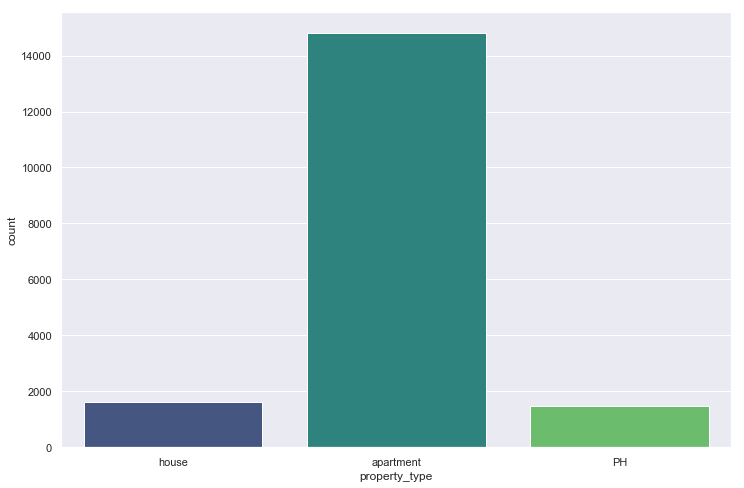

In [21]:
property_type_countplot = sns.countplot(x="property_type", data=df_filtered, palette='viridis')

In [30]:
df.isnull().sum()

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd             1534
surface_total_in_m2         2393
surface_covered_in_m2       2103
price_usd_per_m2            2942
floor                      16223
rooms                       5462
expenses                   15164
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

In [29]:
df.isnull().any()

created_on                 False
operation                  False
property_type              False
place_with_parent_names    False
lat-lon                    False
lat                        False
lon                        False
price_aprox_usd             True
surface_total_in_m2         True
surface_covered_in_m2       True
price_usd_per_m2            True
floor                       True
rooms                       True
expenses                    True
properati_url              False
barrio                     False
comuna                     False
dtype: bool

In [38]:
df_na = df.dropna(subset=['price_aprox_usd', 'surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2'])
print(df_na.shape)

(15416, 17)


In [39]:
df_na.isnull().sum()

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd                0
surface_total_in_m2            0
surface_covered_in_m2          0
price_usd_per_m2               0
floor                      12934
rooms                       3357
expenses                   12221
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

In [40]:
df_na.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0
5,2017-08-09,sell,store,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.0,30.0,30.0,4000.000000,1.0,NaN,NaN,https://www.properati.com.ar/1cw7a_venta_local_palermo_av-santa-fe_5300_garage_subte-linea-d_solucion-inmobiliaria_gx3,PALERMO,14.0


In [51]:
df_filtered[['surface_total_in_m2','surface_covered_in_m2','property_type']].agg(['mean','max','min'])

,surface_total_in_m2,surface_covered_in_m2,property_type
mean,138.05398,119.053545,NaN
max,184000.00000,150000.000000,house
min,0.00000,1.000000,PH


In [60]:
df_filtered[df_filtered['surface_total_in_m2']<df_filtered['surface_covered_in_m2']]


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
106,2017-09-07,sell,house,|Argentina|Capital Federal|Belgrano|,"-34.566867,-58.444197",-34.566867,-58.444197,1650000.00,455.0,456.0,3626.373626,NaN,5.0,NaN,https://www.properati.com.ar/1ehbq_venta_casa_belgrano_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_toilette_vestidor_luminoso_lujoso_garage_impecable_subte-linea-d_re-max-win,PALERMO,14.0
153,2017-09-12,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5830704,-58.4241896",-34.583070,-58.424190,140000.00,39.0,44.0,3589.743590,NaN,1.0,NaN,https://www.properati.com.ar/1en9l_venta_departamento_palermo_luminoso_estrenar_subte-linea-d_mavia-propiedades,PALERMO,14.0
657,2017-10-17,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5827102814,-58.4268853069",-34.582710,-58.426885,307300.00,59.0,63.0,5208.474576,NaN,NaN,NaN,https://www.properati.com.ar/1gyrq_venta_departamento_palermo-soho_baulera_gimnasio_parrilla_piscina_sum_terraza_luminoso_vista_sauna_garage_amoblado_amenities_aire-acondicionado_estrenar_losa-radiante_subte-linea-d_devoto-citi,PALERMO,14.0
935,2017-11-06,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5869532,-58.4189032",-34.586953,-58.418903,275000.00,13.0,79.0,21153.846154,1.0,4.0,NaN,https://www.properati.com.ar/1htrv_venta_departamento_palermo_scalabrini-ortiz-av-r-_2300_baulera_patio_toilette_dependencias_garage_bengochea-propiedades,PALERMO,14.0
1174,2017-11-22,sell,house,|Argentina|Capital Federal|Palermo|,"-34.583652,-58.444111",-34.583652,-58.444111,930000.00,205.0,343.0,4536.585366,NaN,5.0,NaN,https://www.properati.com.ar/1ibt5_venta_casa_palermo_balcon_lavadero_parrilla_patio_terraza_garage_re-max-total-iv,PALERMO,14.0
1176,2017-11-22,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5821555519,-58.4230147059",-34.582156,-58.423015,297109.32,117.0,745.0,2539.395897,7.0,2.0,NaN,https://www.properati.com.ar/1ibu1_venta_departamento_palermo_thames_2400_subte-linea-d_narvaez-cia-walter-fabian-narvaez-csi-4169,PALERMO,14.0
1317,2017-12-05,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.583175,-58.421452",-34.583175,-58.421452,154000.00,55.0,56.0,2800.000000,1.0,3.0,NaN,https://www.properati.com.ar/1ila0_venta_departamento_palermo_baulera_lavadero_toilette_luminoso_garage_subte-linea-d_re-max-ra-iacute-ces,PALERMO,14.0
1547,2017-12-18,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.596423,-58.422257",-34.596423,-58.422257,151500.00,50.0,4556.0,3030.000000,4.0,2.0,NaN,https://www.properati.com.ar/1j2e5_venta_departamento_palermo_gimnasio_lavadero_parrilla_piscina_sum_sauna_garage_subte-linea-b_re-max-total-ii,PALERMO,14.0
2300,2018-01-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5673864513,-58.4321862422",-34.567386,-58.432186,330000.00,95.0,100.0,3473.684211,3.0,3.0,NaN,https://www.properati.com.ar/1k9zk_venta_departamento_palermo_san-benito-de-palermo_1600_balcon_lavadero_luminoso_dependencias_placard_doble-circulacion_podesta-castro-propiedades,PALERMO,14.0
2314,2018-01-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5860312,-58.419436",-34.586031,-58.419436,140000.00,55.0,56.0,2545.454545,NaN,3.0,1500.0,https://www.properati.com.ar/1kbgk_venta_departamento_palermo_subte-linea-d_birabel-bienes-raices,PALERMO,14.0


In [66]:
df['wrong_surface_rows'] = 'no'; df.loc[df['surface_total_in_m2']<df['surface_covered_in_m2'],'wrong_surface_rows'] = 'yes'

In [69]:
df[df['wrong_surface_rows']=='yes']

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,wrong_surface_rows
106,2017-09-07,sell,house,|Argentina|Capital Federal|Belgrano|,"-34.566867,-58.444197",-34.566867,-58.444197,1650000.00,455.0,456.0,3626.373626,NaN,5.0,NaN,https://www.properati.com.ar/1ehbq_venta_casa_belgrano_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_toilette_vestidor_luminoso_lujoso_garage_impecable_subte-linea-d_re-max-win,PALERMO,14.0,yes
153,2017-09-12,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5830704,-58.4241896",-34.583070,-58.424190,140000.00,39.0,44.0,3589.743590,NaN,1.0,NaN,https://www.properati.com.ar/1en9l_venta_departamento_palermo_luminoso_estrenar_subte-linea-d_mavia-propiedades,PALERMO,14.0,yes
657,2017-10-17,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5827102814,-58.4268853069",-34.582710,-58.426885,307300.00,59.0,63.0,5208.474576,NaN,NaN,NaN,https://www.properati.com.ar/1gyrq_venta_departamento_palermo-soho_baulera_gimnasio_parrilla_piscina_sum_terraza_luminoso_vista_sauna_garage_amoblado_amenities_aire-acondicionado_estrenar_losa-radiante_subte-linea-d_devoto-citi,PALERMO,14.0,yes
935,2017-11-06,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5869532,-58.4189032",-34.586953,-58.418903,275000.00,13.0,79.0,21153.846154,1.0,4.0,NaN,https://www.properati.com.ar/1htrv_venta_departamento_palermo_scalabrini-ortiz-av-r-_2300_baulera_patio_toilette_dependencias_garage_bengochea-propiedades,PALERMO,14.0,yes
1174,2017-11-22,sell,house,|Argentina|Capital Federal|Palermo|,"-34.583652,-58.444111",-34.583652,-58.444111,930000.00,205.0,343.0,4536.585366,NaN,5.0,NaN,https://www.properati.com.ar/1ibt5_venta_casa_palermo_balcon_lavadero_parrilla_patio_terraza_garage_re-max-total-iv,PALERMO,14.0,yes
1176,2017-11-22,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5821555519,-58.4230147059",-34.582156,-58.423015,297109.32,117.0,745.0,2539.395897,7.0,2.0,NaN,https://www.properati.com.ar/1ibu1_venta_departamento_palermo_thames_2400_subte-linea-d_narvaez-cia-walter-fabian-narvaez-csi-4169,PALERMO,14.0,yes
1317,2017-12-05,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.583175,-58.421452",-34.583175,-58.421452,154000.00,55.0,56.0,2800.000000,1.0,3.0,NaN,https://www.properati.com.ar/1ila0_venta_departamento_palermo_baulera_lavadero_toilette_luminoso_garage_subte-linea-d_re-max-ra-iacute-ces,PALERMO,14.0,yes
1547,2017-12-18,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.596423,-58.422257",-34.596423,-58.422257,151500.00,50.0,4556.0,3030.000000,4.0,2.0,NaN,https://www.properati.com.ar/1j2e5_venta_departamento_palermo_gimnasio_lavadero_parrilla_piscina_sum_sauna_garage_subte-linea-b_re-max-total-ii,PALERMO,14.0,yes
2300,2018-01-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5673864513,-58.4321862422",-34.567386,-58.432186,330000.00,95.0,100.0,3473.684211,3.0,3.0,NaN,https://www.properati.com.ar/1k9zk_venta_departamento_palermo_san-benito-de-palermo_1600_balcon_lavadero_luminoso_dependencias_placard_doble-circulacion_podesta-castro-propiedades,PALERMO,14.0,yes
2314,2018-01-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5860312,-58.419436",-34.586031,-58.419436,140000.00,55.0,56.0,2545.454545,NaN,3.0,1500.0,https://www.properati.com.ar/1kbgk_venta_departamento_palermo_subte-linea-d_birabel-bienes-raices,PALERMO,14.0,yes


In [71]:
conteo_puntos = df_filtered.groupby(['lat', 'lon']).size()
conteo_puntos[conteo_puntos > 1].sort_values(ascending=False).head(10)

lat                  lon               
-34.5895459          -58.39736360000001    155
-34.571149600000005  -58.4232966           127
yes                  yes                   112
-34.5620844          -58.4566864            87
-34.6209278          -58.44587360000001     48
-34.6098208          -58.3926061            44
-34.622972999999995  -58.439913             41
-34.6086076          -58.44851510000001     40
-34.6177194          -58.3620561            36
-34.603771           -58.381587             36
dtype: int64

In [72]:
conteo_puntos.name = 'conteo'

df_filtered = df_filtered.join(conteo_puntos, on=['lat', 'lon'])

df_filtered = df_filtered[df_filtered.conteo <= 5]

In [73]:
df_filtered.drop('conteo', inplace=True, axis=1)

In [74]:
df_filtered

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,wrong_surface_rows
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.589,-58.4299,2e+06,312,NaN,6410.26,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14,no
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.5889,-58.4135,340000,130,120,2615.38,NaN,4,8000,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14,no
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577,-58.4234,222000,52,48,4269.23,NaN,1,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14,no
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595,-58.4274,180000,70,70,2571.43,NaN,NaN,3000,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14,no
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.5794,-58.4364,1.2e+06,532,334,2255.64,NaN,6,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14,no
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.5809,-58.4404,270000,67,64,4029.85,NaN,3,3900,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14,no
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.5898,-58.4286,219000,72,NaN,3041.67,NaN,3,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14,no
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.5807,-58.3981,NaN,238,238,NaN,NaN,5,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14,no
29,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.594251,-58.4166447",-34.5943,-58.4166,250000,67,60,3731.34,NaN,2,NaN,https://www.properati.com.ar/1e2mz_venta_departamento_palermo_balcon_lavadero_parrilla_piscina_aire-acondicionado_apto-credito-hipotecario_ageo-propiedades_dwr,PALERMO,14,no
32,2017-08-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5722218,-58.4211164",-34.5722,-58.4211,2.6e+06,400,400,6500,NaN,5,20000,https://www.properati.com.ar/1e3ol_venta_departamento_palermo_balcon_suite_lavadero_toilette_vestidor_luminoso_vista_sauna_lujoso_dependencias_garage_placard_covello-propiedades_9ij,PALERMO,14,no
